In [8]:
!pip install wget

In [9]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import wget
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [10]:
filename = wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/20_newsgroups.zip", "20_newsgroups.zip")
!unzip 20_newsgroups.zip
DATA_DIR = "20_newsgroups"

Streaming output truncated to the last 5000 lines.
  inflating: 20_newsgroups/sci.electronics/53948  
  inflating: 20_newsgroups/sci.electronics/54351  
  inflating: 20_newsgroups/talk.politics.guns/54118  
  inflating: 20_newsgroups/talk.politics.guns/54588  
  inflating: 20_newsgroups/talk.politics.guns/54127  
  inflating: 20_newsgroups/talk.politics.guns/53302  
  inflating: 20_newsgroups/talk.politics.guns/54315  
  inflating: 20_newsgroups/talk.politics.guns/54771  
  inflating: 20_newsgroups/talk.politics.guns/54543  
  inflating: 20_newsgroups/talk.politics.guns/55233  
  inflating: 20_newsgroups/talk.politics.guns/55039  
  inflating: 20_newsgroups/talk.politics.guns/54749  
  inflating: 20_newsgroups/talk.politics.guns/55234  
  inflating: 20_newsgroups/talk.politics.guns/54782  
  inflating: 20_newsgroups/talk.politics.guns/54544  
  inflating: 20_newsgroups/talk.politics.guns/54312  
  inflating: 20_newsgroups/talk.politics.guns/54120  
  inflating: 20_newsgroups/talk.polit

## Functions from lab

In [15]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [38]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [19]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

## Q1

In [20]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [21]:
def binary_baseline_data(file_list, num_words = 1000):
    # Calculate word count in corpus
    news_cnt = corpus_count_words(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
 
    return X, y

In [22]:
# get the baseline data
X, y = binary_baseline_data(all_files)

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9472744159462742
Test accuracy: 0.6776666666666666


In [23]:
X


,the,to,of,a,and,I,is,in,that,AX,edu,it,for,you,on,be,com,s,have,are,not,with,t,The,this,1,as,or,was,From,Subject,ID,Message,Lines,Organization,they,but,by,can,In,...,INS,Smith,yourself,assume,worth,guy,wasn,box,involved,error,values,week,1993Apr5,move,taking,doubt,Eric,37,test,g,w,coming,05,action,1993Apr17,01,Thomas,United,uchicago,BATF,friend,HP,isc,present,shall,outside,weapons,cars,Summary,recently
20_newsgroups/rec.sport.hockey/53663,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.sport.hockey/53849,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.sport.hockey/54078,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.sport.hockey/53971,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.sport.hockey/53857,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20_newsgroups/rec.autos/102936,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.autos/102947,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
20_newsgroups/rec.autos/102767,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.autos/101665,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Q1 (a)

Features consist of top 1000 most common words in the files.
The data within the data frame shows weather the feature (common word) exists in the document (rowindex). 1 represents the word exists in the document and 0 represents it doenst. In total, there are 19997 documents in the dataframe and 1000 words (features) in the coloumn. The hyperparameter is the the value of C in the logistic regressions, C is the regularization parameter.  

### Q1 (b)

Modify the following function:

In [26]:
import nltk
from nltk.stem import *
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [27]:
# download required resources
nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
def corpus_count_words_improved (file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    stoplist = stopwords.words('english')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words1 = tokenizer.tokenize(file_data)
            file_words = [words for words in file_words1 if not words in stoplist]
            word_counter.update(file_words)
    return word_counter

In [ ]:
def binary_improved_data(file_list, num_words = 1000):
       # Calculate word count in corpus
    news_cnt = corpus_count_words_improved(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"

    return X, y
   

### Q1 (c)

Modify the following partial code to calculate the train and test accuracy and answer the question in the markdown cell below

In [ ]:
# get the baseline data
X, y = binary_improved_data(all_files)

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)



# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9464170893762949
Test accuracy: 0.6898333333333333


I implemented remove stop words from the feature set. This helped to remove all the features which are considered stop word. The effects of removing stop words had a positive effect on the training and testing accuracy. The trianing acruacy didnt improve by a lot., it went from 94.57% to 95.82%. The testing accuracy improved by 1%, it went from 67.41% to 68.98%.

### Q1 (d)

Modify the partial code below

In [ ]:
def random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    for i in range(num_tests):
      # split to train and test set
      p = random.randint(1, 1000)
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=p)

      # train a logistic regression classifier
      clf = LogisticRegression(C=1.0).fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      # calculate train and test accuracy
      train_results.append(accuracy_score(y_train, y_train_predict))
      test_results.append(accuracy_score(y_test, y_test_predict))
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q1 (e)

Use the following code to calculate the mean accuracy and 95% confidence interval over 10 random splits

In [ ]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9480674430235052
Train confidence interval over 10 random splits: [0.9466416137506742, 0.9494932722963362]
Test mean accuracy over 10 random splits: 0.6933999999999999
Test confidence interval over 10 random splits: [0.6902913687954724, 0.6965086312045274]


No, the accuracy hasnt improved a lot. Running a 95% confidence intervals tells me that by using 10 different splits of the data the accuracy does not change much for both traning and test accuracy. This means that the dataset is pretty homogenous, meaning spliting the data at any place results in a similar accuracy. The accuracy has improved from only 1 set but the differnce is very minisicule. 

### Q1 (f)

Modify the partial code below

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)

In [ ]:
def random_cm(X, y, num_tests):
    # cm_list is a list of confusion matrices for the different random splits of the dataset
    cm_list = []
   
    for i in range(num_tests):
      # split to train and test set
      p = random.randint(1, 1000)
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=p)

      # train a logistic regression classifier
      clf = LogisticRegression(C=1.0).fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      cm_list.append(confusion_matrix(y_test, y_test_predict))
    
    # sum the confusion matrices and return the combined confusion matrix
    combined_cm = np.array(cm_list).sum(axis=0)

    # validate return type
    assert isinstance(combined_cm, np.ndarray), "return type"
    
    return combined_cm

### Q1 (g)

Use the following code to produce a confusion matrix for 10 random splits

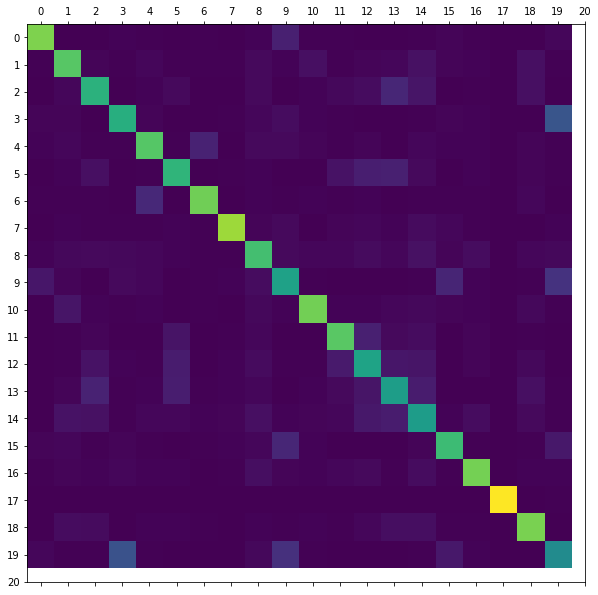

In [ ]:
cm10 = random_cm(X, y, num_tests = 10)
plot_confusion_matrix(cm10)

Yes, some classes are more easily confused with other, some examples are 19 (religion) and 3 (pc Hardware), 13 (med) and 2 (windows), 15 (religion.christain) and 9 (baseball), and 6 (for sale) and 4 (mac hardware). These files might have similiar content and writing style. They might have similar words. As these topics are not very related to each other a better model is required.

## Q2

### Q2 (a)

Modify the partial code below

In [ ]:
def feature_num(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]
        
        # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)

        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q2 (b)

Use the following code to plot the train and test accuracy for the different feature sets sizes

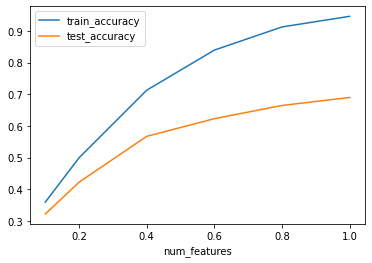

In [ ]:
feature_num_df = feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

Reducing number of features resulted in drop of accuracy for both train and test datasets. Therefore, using more features could result in improved accuracy of the model.

## Q3

### Q3 (a)

Modify the partial code below

In [ ]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # train a logistic regression classifier
        clf = LogisticRegression(C=param).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
       
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q3 (b)

Use the following code to plot the train and test accuracy for the different the parameters

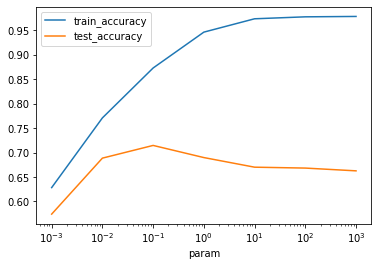

In [ ]:
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

The training accuracy has gone up for increasing C value, however it peaks at C=10 and no significant improvement can be seen. For Test set, C = 0.1 gives the best possible results, C more than 0.1 reduces the accuracy of the model.

## Q4

### Q4 (a)

Modify the partial code below

In [ ]:
def tf_improved_data(file_list, num_words = 1000):
    
    news_cnt = corpus_count_words_improved(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)            
            df_rows.append([word_counter[word] if word in file_words else 0 for word in word_list])  
            word_counter.clear()    
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
  
    # validate return types
    #assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y, word_counter

### Q4 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [ ]:
X_tf, y_tf, w = tf_improved_data(all_files)

In [ ]:
X_tf

,I,AX,edu,com,The,1,From,Subject,ID,Message,Lines,Organization,In,2,would,0,writes,3,Re,one,References,article,X,news,M,A,Sender,It,like,people,4,University,If,5,know,Posting,Host,get,think,This,...,MIT,land,model,DB,hell,higher,horus,blue,toronto,leave,nl,claims,Good,Chris,reference,church,child,looks,sent,basis,lost,Access,ways,military,choice,UK,interest,bear,exists,takes,ideas,uni,soon,cut,CD,2000,issues,contact,follow,save
20_newsgroups/rec.sport.hockey/53663,4,0,3,0,0,0,1,1,1,1,1,1,2,0,1,0,1,0,1,0,1,1,0,1,0,3,1,0,1,0,0,1,0,0,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.sport.hockey/53849,3,0,9,0,0,3,1,1,1,1,1,1,4,3,1,0,2,2,1,1,1,2,0,2,0,3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.sport.hockey/54078,2,0,1,3,1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.sport.hockey/53971,7,0,2,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,2,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.sport.hockey/53857,1,0,0,4,2,0,1,1,1,1,1,1,0,0,2,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20_newsgroups/rec.autos/102936,3,0,2,2,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20_newsgroups/rec.autos/102947,0,0,1,3,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.autos/102767,1,0,0,0,2,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20_newsgroups/rec.autos/101665,2,0,4,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#X_tf, y_tf = tf_improved_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X_tf, y_tf, num_tests = 30)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.912957538520159
Train confidence interval over 10 random splits: [0.9097683149970525, 0.9161467620432656]
Test mean accuracy over 10 random splits: 0.6974
Test confidence interval over 10 random splits: [0.6954981284136199, 0.6993018715863801]


Term Frequency performs better than the binary encoding. The test and train mean accuracy has increased compared to the binary encoding. This happens becasue term frequecy has a better represnetation of the information in the dataset.

## Q5

### Q5 (a)

Modify the partial code below

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

def nb_random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    for i in range(num_tests):
      # split to train and test set
      p = random.randint(1, 1000)
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=p)

      # train a Multinominal Navie Bayes classifier
      mnb = MultinomialNB()
      mnb.fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = mnb.predict(X_train)
      y_test_predict = mnb.predict(X_test)

      # calculate train and test accuracy
      train_results.append(accuracy_score(y_train, y_train_predict))
      test_results.append(accuracy_score(y_test, y_test_predict))
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q5 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [ ]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = nb_random_mean_ci(X, y, num_tests = 50)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.7431206687147245
Train confidence interval over 10 random splits: [0.7424275648657783, 0.7438137725636706]
Test mean accuracy over 10 random splits: 0.6827133333333333
Test confidence interval over 10 random splits: [0.6813160676827128, 0.6841105989839538]


Multinomial Navie Bayes has the best performace compared to Guassian and Bernoulli NB. However, logistic regression has better results overall. The Test mean accuracy is comparable for both Navie Bayes and Logistic regression. However, train accuracy dropped quit a little bit for NB.

## Q6

### Q6 (a)

Modify the partial code below

In [86]:
def binary_med_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    news_cnt = corpus_count_words_improved(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    y = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
  
    y1 = str(file_path).split("/")
  
   
    if 'sci.med'in y1:
        y.append(1)
    else:
        y.append(0)
    

    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])

    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

In [87]:
X, y = binary_med_data(all_files)

In [78]:
y

[0, 0, 0]

In [77]:
for i in range(len(y)):
  if y[i] == 1:
    print('true')

### Q6 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [ ]:
#X, y = binary_med_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

[ Write your answer here ]

#Q7

##Q7(a)

use the following code cell to implement your feature encoding

In [ ]:
def data_q7(file_list, num_words = 1000):
  X = None
  y = None
  
  #Please remember to put index for your dataframe as the file name
  #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
  
  # validate return types
  assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
  
  return X, y

##Q7(b)

Use the following code cell to implement your model

In [ ]:
def build_model_q7():
  #write your code here, define your model
  MODELQ7=None
  return MODELQ7

Code for evaluating p at k 

In [ ]:
def calculate_average_precision_at_k(MODELQ7, all_files, training_files, testing_files,k=None):
  
  training_files = [str(f) for f in open(training_files,mode='r').read().splitlines()]
  testing_files = [str(f) for f in open(testing_files,mode='r').read().splitlines()]
  if k is None:
    k=len(testing_files)

  X, y = data_q7(all_files) 
  X['gt'] = y
  training = X.loc[training_files]
  X_train = training.loc[:,training.columns!='gt']
  y_train = training['gt'].values

  testing = X.loc[testing_files]
  X_test = testing.loc[:,testing.columns!='gt']
  y_test = testing['gt'].values

  MODELQ7.fit(X_train,y_train)
  y_pred = MODELQ7.predict(X_test)
  y_pred_prob = MODELQ7.predict_proba(X_test)
  confidences = np.max(y_pred_prob,axis=1)
  
  p_at_k = []
  rel_at_k = []
  confidence_order = np.argsort(confidences)
  for i in range(1,k+1):
    top_confidence = confidence_order[-i:]
    pred_top_i = y_pred[top_confidence]
    gt_top_i = np.array(y_test)[top_confidence]
    p_at_i = np.sum(pred_top_i == gt_top_i)/i
    rel_at_i = (pred_top_i[0] == gt_top_i[0])
    p_at_k.append(p_at_i)
    rel_at_k.append(rel_at_i)
  print('average precision at {} is {}'.format(k,np.dot(p_at_k,rel_at_k)/k))
  return np.dot(p_at_k,rel_at_k)/k

In [ ]:
# Example usage:
#m = calculate_average_precision_at_k_baseline(LogisticRegression(C=1), all_files, 'training_files_Q7.txt', 'testing_files_Q7.txt')

##Q7(c)

Please write your answers here